<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#qn1" data-toc-modified-id="qn1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>qn1</a></span></li><li><span><a href="#qn-2" data-toc-modified-id="qn-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>qn 2</a></span></li><li><span><a href="#qn3" data-toc-modified-id="qn3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>qn3</a></span></li><li><span><a href="#qn4" data-toc-modified-id="qn4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>qn4</a></span></li><li><span><a href="#qn-5" data-toc-modified-id="qn-5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>qn 5</a></span></li><li><span><a href="#qn-6" data-toc-modified-id="qn-6-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>qn 6</a></span></li><li><span><a href="#qn-7" data-toc-modified-id="qn-7-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>qn 7</a></span></li><li><span><a href="#qn8" data-toc-modified-id="qn8-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>qn8</a></span></li><li><span><a href="#qn9" data-toc-modified-id="qn9-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>qn9</a></span></li><li><span><a href="#qn-10" data-toc-modified-id="qn-10-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>qn 10</a></span></li><li><span><a href="#qn-11" data-toc-modified-id="qn-11-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>qn 11</a></span></li><li><span><a href="#qn-12" data-toc-modified-id="qn-12-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>qn 12</a></span></li><li><span><a href="#qn-13" data-toc-modified-id="qn-13-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>qn 13</a></span></li><li><span><a href="#qn-14" data-toc-modified-id="qn-14-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>qn 14</a></span></li><li><span><a href="#qn-15" data-toc-modified-id="qn-15-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>qn 15</a></span></li><li><span><a href="#qn-16" data-toc-modified-id="qn-16-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>qn 16</a></span></li><li><span><a href="#qn-18" data-toc-modified-id="qn-18-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>qn 18</a></span></li></ul></div>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline

import scipy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics as smg

pd.set_option('display.max_columns',99)

**NBA Wages - practical** 


In this part we are going to investigate the factors which affect NBA players’ wages,
as a means to helping us understand multiple regression analysis. The dataset we are
going to use is prebuilt into Gretl, and comes from Jeffrey Wooldridge’s great textbook,
’Introductory Econometrics’. In order to load the dataset, navigate to File → Open data
→ Sample file... Then select the Wooldridge tab (if you can see it - if you cannot I will
explain how to access this in a minute) and open the ’nbasal’ dataset. If you cannot see
the Wooldridge tab you may need to go to:

http://gretl.sourceforge.net/gretl_data.html#jw
and download the wooldridge data.exe or wooldridge.tar.gz file (I recommend the
former method because it handles the installation for you). Alternatively, you can
load in the sample dataset from clicking on the ’Look on server’ button at the top of
the sample datasets box. Alternatively, I have provided a link to download a .xls file
containing the dataset on: (however note that this data is missing the descriptive labels
of the native Wooldridge Gretl file)
http://www.oxbridge-tutor.co.uk/#!datasets/culy
The data contains demographic and position information for a sample of 269 players.
The descriptive labels which are next to the variables contain descriptions of the series,
and are a good idea for when you go on to do your own projects as they help you to
keep track of variables.


In [2]:
!ls *.xls

nbasal.xls      problemset1.xls


In [3]:
df = pd.read_excel('nbasal.xls')
print(df.shape)
df.head()

(269, 23)


,ID,marr,wage,exper,age,coll,games,minutes,guard,forward,center,points,rebounds,assists,draft,allstar,avgmin,lwage,black,children,expersq,agesq,marrblck
0,1,1,1002.5,4,27,4,77,2867,1,0,0,16,4,5,19.0,0,37.23,6.91,1,0,16,729,1
1,2,1,2030.0,5,28,4,78,2789,1,0,0,13,3,9,28.0,0,35.76,7.62,1,1,25,784,1
2,3,0,650.0,1,25,4,74,1149,0,0,1,6,3,0,19.0,0,15.53,6.48,1,0,1,625,0
3,4,0,2030.0,5,28,4,47,1178,0,1,0,7,5,2,1.0,0,25.06,7.62,1,0,25,784,0
4,5,0,755.0,3,24,4,82,2096,1,0,0,11,4,3,24.0,0,25.56,6.63,1,0,9,576,0


# qn1

Draw a boxplot for the players’ wages. (If you don’t know how to do a given plot
etc. then consult the user manual by clicking the ’Help’ menu). Which way are the
players’ wages skewed? Towards infinity or zero?

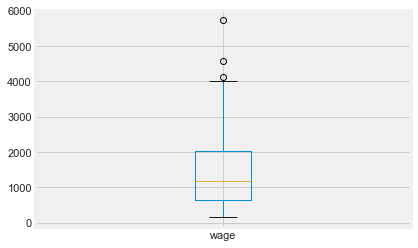

In [4]:
df.wage.plot(kind='box')

In [5]:
# the wage data is +ve skewed

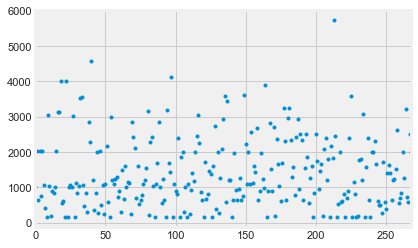

In [6]:
df.wage.plot(style='.')

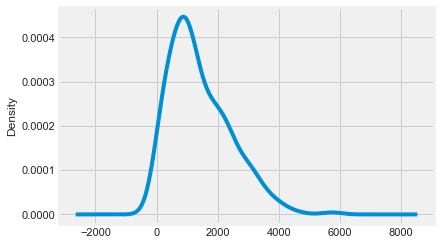

In [7]:
df.wage.plot(kind='kde')

In [8]:
scipy.stats.skew(df.wage)

0.9568107387333451

# qn 2
Let’s investigate the relationships between variables in our dataset.  
In practice if two variables are highly correlated with one another,
then we may run into the problems caused by multicollinearity. 

This will make it hard for ordinary least
squares to decipher the effect of one variable from another in a regression model.


One way of investigating the relationships is via their correlation. 

Are there any variables that are particularly highly correlated with
experience? What would be the issue of including both of these measures in a
regression with wages as the dependent variable?

In [11]:
df.corr()['wage'].sort_values()

draft      -0.362531
guard      -0.124664
coll       -0.105632
ID          0.015450
forward     0.051110
black       0.076822
center      0.096684
marrblck    0.151423
marr        0.158117
children    0.165735
games       0.303766
assists     0.328193
agesq       0.339300
age         0.342444
expersq     0.345839
allstar     0.397333
exper       0.409176
rebounds    0.540872
minutes     0.563374
avgmin      0.621789
points      0.657027
lwage       0.893839
wage        1.000000
Name: wage, dtype: float64

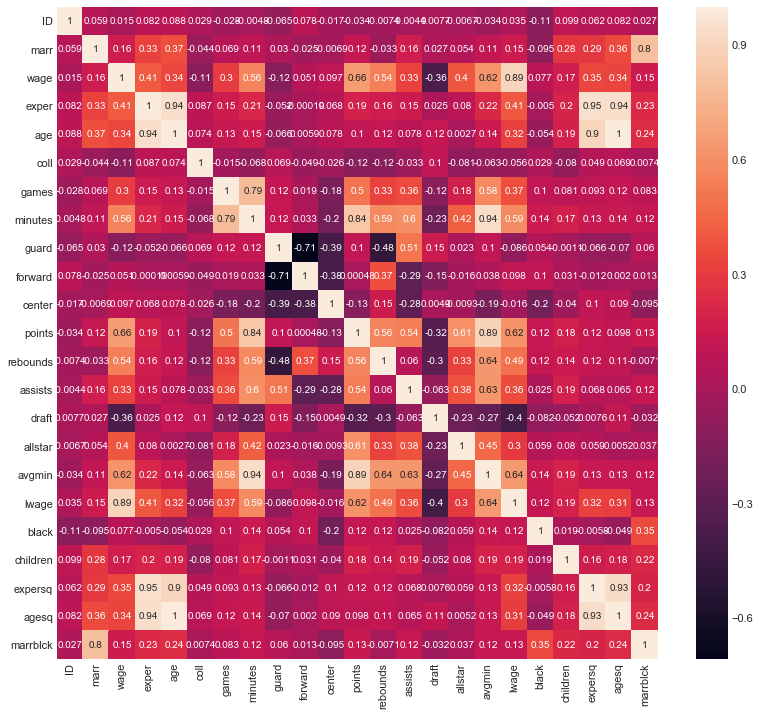

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

From the various experience bivariate correlations, it is clear that age (as you might
expect) is highly correlated with experience. The issue with including both of these
variables in an OLS regression is due to the high level of multicollinearity amongst
them. Intuitively, OLS is going to struggle to disentangle the effect of experience
from age on players’ wages. This will be realised by a large estimated standard
error for both coefficients, and perhaps a lack of individual significance.

# qn3
Another useful aspect of a correlation matrix is that it can give you a feel for which
variables are correlated with your dependent variable. Which variables (other than
the log of wages), show the highest correlation with wages?

A number of variables are quite highly correlated with wages, having a correlation
over 0.3: experience, age, games, minutes, points, rebounds, assists, draft, allstar,
avgmin, and trivially lwage, expersq, agesq.

In [18]:
wage_corr = df.corr()['wage'].sort_values()
wage_corr[ abs(wage_corr) > 0.3]

draft      -0.362531
games       0.303766
assists     0.328193
agesq       0.339300
age         0.342444
expersq     0.345839
allstar     0.397333
exper       0.409176
rebounds    0.540872
minutes     0.563374
avgmin      0.621789
points      0.657027
lwage       0.893839
wage        1.000000
Name: wage, dtype: float64

# qn4
Graphically investigate whether players who are more experienced earn more.
How strong is the correlation between these two variables?


The result of an X-Y scatter is shown below. There appears to be quite a strong
positive correlation between these two variables.

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


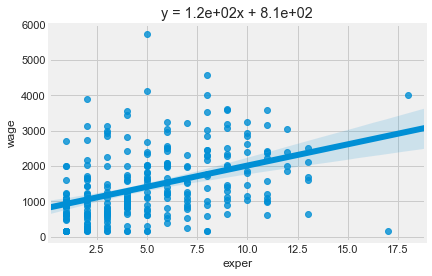

In [31]:
p = sns.regplot(x='exper',y='wage',data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())

text = 'y = {:.2g}x + {:.2g}'.format(slope, intercept)

plt.title(text);

# qn 5
Create an ordinary least squares model which investigates how experience affects
a player’s wages.

In [39]:
res = smf.ols('wage ~ exper', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     53.69
Date:                Tue, 25 Jun 2019   Prob (F-statistic):           2.79e-12
Time:                        21:12:22   Log-Likelihood:                -2214.7
No. Observations:                 269   AIC:                             4433.
Df Residuals:                     267   BIC:                             4441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    807.9317    100.847      8.011      0.000     609.375    1006.489
exper        120.3166     16.420      7.327      0.000      87.988     152.646
==============================================================================
Omnibus:                       49.179   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.742
Skew:                           0.990   Prob(JB):                     1.46e-19
Kurtosis:                       4.954   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# qn 6
What is the average wage increase associated with an increase in experience by
one year implied by your model?

One more year of experience is associated with an average increase in salary of
around $120K.

# qn 7
Do you think that the estimates of the effect of experience on wages is likely too
big or too small? Which Gauss-Markov assumption is being violated, and why?

In my view this coefficient likely overstates the effect of experience on wages, since
those who are better tend to be employed as professional basketball players for
longer, and hence are paid more. In other words there is another third variable
’quality’ which is causing both wages and experience to be higher. A measure of
players’ quality is contained within the variables: ’points’, ’minutes’, ’rebounds’
etc. variables. So their inclusion is likely to bring the estimate of the effect of
experience down.

# qn8
Create another regression with wages as a dependent variable, and age as the
independent variable (along with a constant). Does this imply that the effect of age
is positive or negative?

The results of this regression are shown below. Unsurprisingly this model suggests
that the effect of age on wages is positive, although, at first glance, the effect appears
that it might be smaller than experience

In [40]:
y = df.wage
x = df.age
x1 = sm.add_constant(x)

sm.OLS(y,x1).fit().summary()

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     35.47
Date:                Tue, 25 Jun 2019   Prob (F-statistic):           8.14e-09
Time:                        21:34:15   Log-Likelihood:                -2222.5
No. Observations:                 269   AIC:                             4449.
Df Residuals:                     267   BIC:                             4456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1341.7284    467.888     -2.868      0.004   -2262.949    -420.508
age          100.9546     16.951      5.956      0.000      67.580     134.329
==============================================================================
Omnibus:                       39.474   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.176
Skew:                           0.921   Prob(JB):                     6.33e-13
Kurtosis:                       4.274   Cond. No.                         225.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# qn9
What would would be the average wage implied by your model for an individual
of 30? What about for a 90 year old? What is the problem with the latter estimate?

The average wage for a 30 year old would be 100.955 x age - 1341.73 which is
around 1.7m - this seems reasonable. For a 90 year old, our model predicts that
their wage will be close to 8m! This latter prediction is completely out of sample,
and also very unrealistic. One has to be very careful when extending the results
of a regression to make out of sample predictions. (Out of sample here means that
we currently do not have any data for the wages of 90 year old basketball players.)

In [41]:
const = -1341.7284
slope = 100.9546

x = 30
y = slope * x + const
y

1686.9096

In [42]:
const = -1341.7284
slope = 100.9546

x = 90
y = slope * x + const
y

7744.185600000001

# qn 10
How might we rectify the issue of the unrealistic estimates from the previous
model?

One way might be to include the square of the age in the regression, as this would
suggest that there might be diminishing marginal returns to age. I include the
results of this regression below.

Note that the results of this regression aren’t that suggestive of diminishing
marginal returns to age. Perhaps a better way to deal with this issue would
be not to make predictions on out of sample data!

In [43]:
x = df[['age','agesq']]
x1 = sm.add_constant(x)
y = df['wage']

sm.OLS(y,x1).fit().summary()

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     17.78
Date:                Tue, 25 Jun 2019   Prob (F-statistic):           5.64e-08
Time:                        21:43:10   Log-Likelihood:                -2222.4
No. Observations:                 269   AIC:                             4451.
Df Residuals:                     266   BIC:                             4462.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2701.0087   3045.888     -0.887      0.376   -8698.126    3296.109
age          197.2750    213.941      0.922      0.357    -223.958     618.508
agesq         -1.6791      3.718     -0.452      0.652      -8.999       5.641
==============================================================================
Omnibus:                       39.656   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.964
Skew:                           0.931   Prob(JB):                     7.04e-13
Kurtosis:                       4.235   Cond. No.                     4.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# qn 11
Now create a regression with both experience and age in the model. What has
happened to the sign of the coefficient on age? Why has this happened?

The results of this regression are shown below. Note that the coefficient on age is
now negative, and the coefficient on experience has nearly doubled. This unstable
change in the coefficient values is due to high multicollinearity between age and
experience.

In [45]:
x = df[['exper','age']]
x1 = sm.add_constant(x)
y = df['wage']

sm.OLS(y,x1).fit().summary()

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     29.86
Date:                Tue, 25 Jun 2019   Prob (F-statistic):           2.00e-12
Time:                        21:45:45   Log-Likelihood:                -2212.1
No. Observations:                 269   AIC:                             4430.
Df Residuals:                     266   BIC:                             4441.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3295.2932   1096.404      3.006      0.003    1136.559    5454.028
exper        223.6860     48.210      4.640      0.000     128.763     318.609
age         -110.1153     48.335     -2.278      0.024    -205.284     -14.947
==============================================================================
Omnibus:                       57.784   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.329
Skew:                           1.077   Prob(JB):                     2.02e-26
Kurtosis:                       5.433   Cond. No.                         559.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# qn 12
Let’s now try to examine whether individuals who score more points tend to earn
more by creating a regression of wages on points per game (and a constant). 

What does your model suggest would be the increase in wages for an increase in 10 points
per game?

The results of this regression are shown below along with the graph of actual vs
fitted wages. The results of this model are suggestive that an increase in 10 points
per game is associated with an increase in wages on average by $1.1m.

In [51]:
df.head()

,ID,marr,wage,exper,age,coll,games,minutes,guard,forward,center,points,rebounds,assists,draft,allstar,avgmin,lwage,black,children,expersq,agesq,marrblck,points_per_game
0,1,1,1002.5,4,27,4,77,2867,1,0,0,16,4,5,19.0,0,37.23,6.91,1,0,16,729,1,0.207792
1,2,1,2030.0,5,28,4,78,2789,1,0,0,13,3,9,28.0,0,35.76,7.62,1,1,25,784,1,0.166667
2,3,0,650.0,1,25,4,74,1149,0,0,1,6,3,0,19.0,0,15.53,6.48,1,0,1,625,0,0.081081
3,4,0,2030.0,5,28,4,47,1178,0,1,0,7,5,2,1.0,0,25.06,7.62,1,0,25,784,0,0.148936
4,5,0,755.0,3,24,4,82,2096,1,0,0,11,4,3,24.0,0,25.56,6.63,1,0,9,576,0,0.134146


In [61]:
x = df['points']
x1 = sm.add_constant(x)
y = df['wage']

res = sm.OLS(y,x1).fit()
res.summary()

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     202.8
Date:                Tue, 25 Jun 2019   Prob (F-statistic):           1.28e-34
Time:                        22:13:12   Log-Likelihood:                -2163.3
No. Observations:                 269   AIC:                             4331.
Df Residuals:                     267   BIC:                             4338.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        278.1023     92.694      3.000      0.003      95.598     460.606
points       111.6667      7.841     14.241      0.000      96.228     127.105
==============================================================================
Omnibus:                       38.558   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.491
Skew:                           0.853   Prob(JB):                     1.21e-13
Kurtosis:                       4.548   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


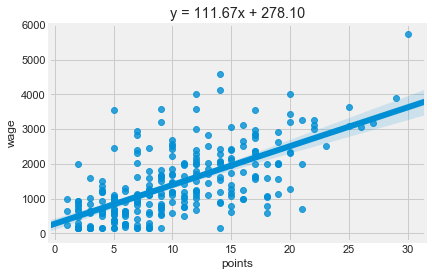

In [62]:
p = sns.regplot(x='points',y='wage',data=df)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())

text = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)

plt.title(text);

# qn 13
You can look at a graph of the residuals (the estimated errors) from the regression,


Which of these plots should you use
to graphically inspect for heteroscedasticity?

Observation number here is arbitrary and does not reflect any mechanism of interest. Hence a residual plot against points is most appropriate. This plot is shown
below.

In [67]:
# dir(res)

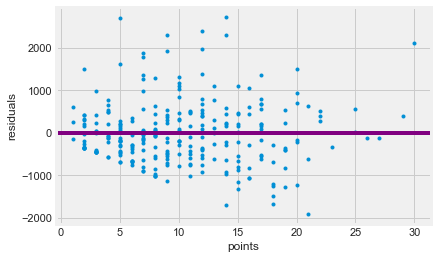

In [74]:
residuals = res.resid
plt.plot(df.points, residuals,'.')
plt.xlabel('points')
plt.ylabel('residuals')
plt.axhline()

# qn 14
Does there appear to be heteroscedasticity? What might be causing it? How might
we rectify it?

I would say that there is definitely evidence of systematic increases in the variance
of our estimates as points increases from 0-15. There is then a decline in variance
towards the latter end of the points spectrum. This makes intuitive sense. When
players score few points, they are not paid much. When they score a reasonable
number of points they tend to be paid more, but there is a higher variance. This
could be because of the fact that players on a basketball team occupy different
positions - some are more focussed on scoring, others on defending. This would
mean that once a threshold number of points is reached the players are paid more or less dependent on their respective abilities in their positions. When a player
scores a high number of points, they are in short supply, and can hence command
a higher wage.

# qn 15
Do you think that the effect of points on wages predicted by your model is too high
or low? Why might this be the case?

I suspect it is too high. There is probably some reverse causality happening,
whereby players that are paid more tend to score more points. Also, points likely
also captures some of the effects of other variables that are important in determining
wages. For example, players from better teams have better team mates, and hence
tend to have more chances to score. At the same time the players on the better
teams tend to be paid more.

# qn 16
We are now going to create two new variables ’pointsq’ and ’pointsc’
equal to the square of points and its cube respectively. 

Now create two new regression models (keeping your current regression of wages
on points):
    
wagei = α + β1pointsi + β2pointsqi  
wagei = α + β1pointsi + β2pointsqi + β3pointsci

  - (a) Which of these regressions has the highest value of R-squared? What does
this mean?
    + The latter model has a higher R-squared of 0.44. This means that these independent variables explain 44% of the variation in the dependent variable.
  - (b) What is the interpretation of the coefficient on ’pointsc’ in the last regression
model?
    + This would suggest that there is diminishing diminishing (yep two diminishings!) marginal returns to points. In other words it is pretty nonsensical.
  - (c) Which of these regressions has the highest value of adjusted R-squared?
    + The last regression still has the highest adjusted R-squared.
  - (d) Out of the three specifications, which would you prefer?
    + The first regression (with only wages regressed on points), since it is parsimonious, and has a clear interpretation. The latter of the three especially is
overfitting the data. I include the last regression fitted residuals below so you
can see for yourself. Don’t let apophenia (seeing meaningless patterns in data)
get the better of you - a linear line is still better than this curve.

In [75]:
df['points_sq'] = df.points ** 2
df['points_cube'] = df.points ** 3

x = df[['points','points_sq']]
x1 = sm.add_constant(x)
y = df['wage']

res = sm.OLS(y,x1).fit()
res.summary()

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     102.0
Date:                Tue, 25 Jun 2019   Prob (F-statistic):           1.36e-33
Time:                        23:03:55   Log-Likelihood:                -2162.8
No. Observations:                 269   AIC:                             4332.
Df Residuals:                     266   BIC:                             4342.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        396.6413    148.060      2.679      0.008     105.123     688.160
points        85.4355     26.726      3.197      0.002      32.814     138.057
points_sq      1.0777      1.050      1.027      0.306      -0.989       3.144
==============================================================================
Omnibus:                       40.249   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.998
Skew:                           0.879   Prob(JB):                     2.09e-14
Kurtosis:                       4.591   Cond. No.                         668.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
x = df[['points','points_sq','points_cube']]
x1 = sm.add_constant(x)
y = df['wage']

res = sm.OLS(y,x1).fit()
res.summary()

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     70.16
Date:                Tue, 25 Jun 2019   Prob (F-statistic):           2.00e-33
Time:                        23:04:19   Log-Likelihood:                -2160.7
No. Observations:                 269   AIC:                             4329.
Df Residuals:                     265   BIC:                             4344.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          59.2577    221.555      0.267      0.789    -376.974     495.489
points        207.2324     65.419      3.168      0.002      78.426     336.039
points_sq      -9.6892      5.387     -1.799      0.073     -20.295       0.917
points_cube     0.2606      0.128      2.037      0.043       0.009       0.512
==============================================================================
Omnibus:                       38.460   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.175
Skew:                           0.871   Prob(JB):                     3.84e-13
Kurtosis:                       4.437   Cond. No.                     2.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

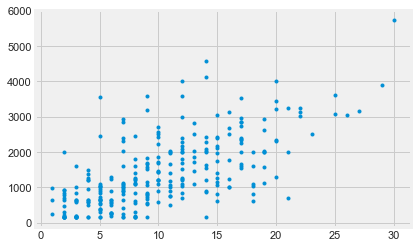

In [78]:
plt.plot(df.points, df.wage,'.')

In [80]:
res.params

const           59.257708
points         207.232450
points_sq       -9.689227
points_cube      0.260608
dtype: float64

In [82]:
const, points, points_sq, points_cube = res.params

In [84]:
x = df.points
y = const + points * df.points + points_sq * df.points_sq + points_cube * df.points_cube

Text(0, 0.5, 'wage')

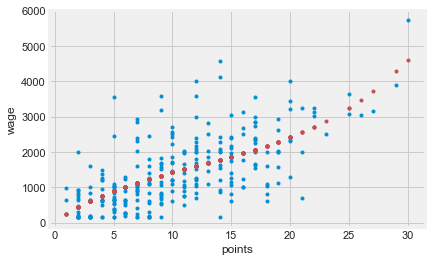

In [90]:
plt.plot(df.points, df.wage,'.')
plt.plot(x,y,'r.')
plt.xlabel('points')
plt.ylabel('wage')

# qn 18
Freestyle: try to create a model which you believe captures explains players wages
best in terms of other attributes

Freestyle: this is the best I /a few of my colleagues could do. I’m not suggesting
by any means this is the gold standard, but in my view it represents a reasonably
good first stab at a reasonable model for wages. The variable ’centerpoint’ is equal
to center times points, and ldraft is the log of the draft variable. All the variables
have the expected signs, and there is not a great deal of movement in coefficient
values when the specification is changed slightly. There is a logic to the inclusion
of the multiplication of center and points, since it is suggested that centers that
score lots of points will be valued disproportionately more (perhaps this makes
sense, my knowledge of basketball could be better!) Also, by logging the draft
variable this allows it to have a nonlinear effect on wages, which is to be expected.

In [91]:
df.columns

Index(['ID', 'marr', 'wage', 'exper', 'age', 'coll', 'games', 'minutes',
       'guard', 'forward', 'center', 'points', 'rebounds', 'assists', 'draft',
       'allstar', 'avgmin', 'lwage', 'black', 'children', 'expersq', 'agesq',
       'marrblck', 'points_per_game', 'points:games', 'points_sq',
       'points_cube'],
      dtype='object')

In [105]:
df['ldraft'] = np.log(df.draft.values)
df['centerpoints'] = df.center * df.points

# the column draft has 29 nans, we remove all 29 rows
df= df.dropna(how='any')

x = df[['points','centerpoints','ldraft','exper']]
x1 = sm.add_constant(x)
y = df['wage']



res = sm.OLS(y,x1).fit()
res.summary()

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     87.93
Date:                Tue, 25 Jun 2019   Prob (F-statistic):           1.45e-45
Time:                        23:27:43   Log-Likelihood:                -1887.3
No. Observations:                 240   AIC:                             3785.
Df Residuals:                     235   BIC:                             3802.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1003.7200    185.293      5.417      0.000     638.672    1368.768
points          68.6397      8.147      8.425      0.000      52.589      84.690
centerpoints    36.1528      9.287      3.893      0.000      17.855      54.450
ldraft        -281.6108     45.220     -6.228      0.000    -370.699    -192.523
exper           83.9601     12.078      6.952      0.000      60.165     107.755
==============================================================================
Omnibus:                       36.034   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.884
Skew:                           0.664   Prob(JB):                     6.77e-21
Kurtosis:                       5.743   Cond. No.                         63.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""